In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('matches.csv')

In [8]:
df.shape

(1095, 20)

In [38]:
df.sample(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
175,501198,2011,Chennai,2011-04-08,League,S Anirudha,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,Chennai Super Kings,runs,2.0,154.0,20.0,N,NaN,BR Doctrove,PR Reiffel
12,335994,2007/08,Mumbai,2008-04-27,League,AC Gilchrist,Dr DY Patil Sports Academy,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,wickets,10.0,155.0,20.0,N,NaN,Asad Rauf,SL Shastri
1068,1426283,2024,Ahmedabad,2024-04-28,League,WG Jacks,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,Royal Challengers Bengaluru,wickets,9.0,201.0,20.0,N,NaN,Nitin Menon,VK Sharma
56,336039,2007/08,Mumbai,2008-05-31,Semi Final,M Ntini,Wankhede Stadium,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,bat,Chennai Super Kings,wickets,9.0,113.0,20.0,N,NaN,Asad Rauf,DJ Harper
158,419149,2009/10,Delhi,2010-04-11,League,PP Chawla,Feroz Shah Kotla,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,wickets,7.0,112.0,20.0,N,NaN,BF Bowden,AM Saheba


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [14]:
df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [15]:
df.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [16]:
df.duplicated().sum()

0

In [17]:
numerical_df  = df.select_dtypes(include=[float,int])

In [18]:
corr_matrix = numerical_df.corr()

In [19]:
corr_matrix

,id,result_margin,target_runs,target_overs
id,1.000000,-0.006853,0.238859,0.046388
result_margin,-0.006853,1.000000,0.395120,0.030970
target_runs,0.238859,0.395120,1.000000,0.352361
target_overs,0.046388,0.030970,0.352361,1.000000


In [21]:
numerical_df.corr()['target_runs']

id               0.238859
result_margin    0.395120
target_runs      1.000000
target_overs     0.352361
Name: target_runs, dtype: float64

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

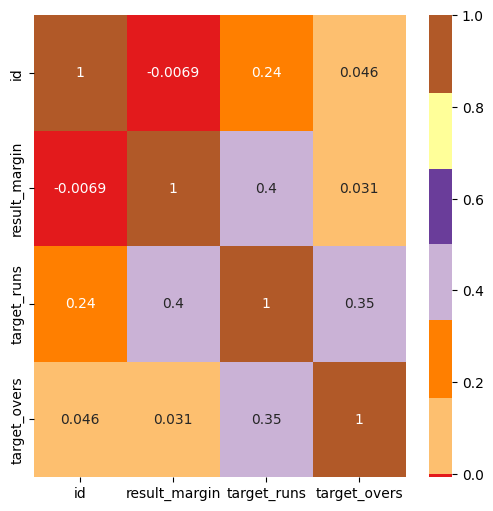

In [23]:
plt.figure(figsize=(6,6))
sns.heatmap(data=corr_matrix ,cmap="Paired",center=0,annot=True)

<Axes: xlabel='winner'>

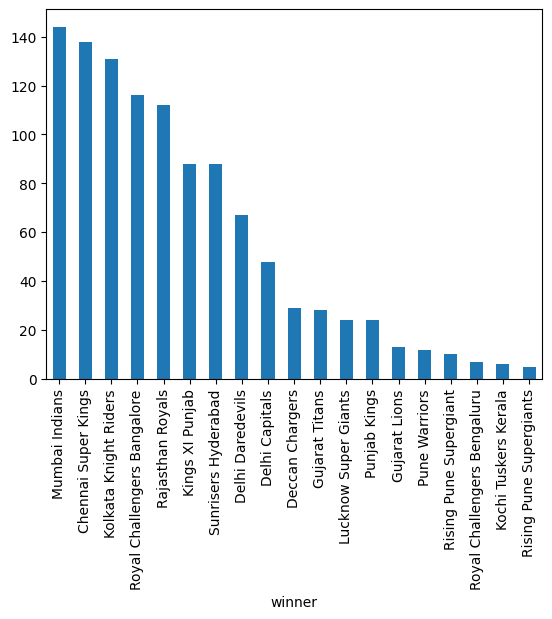

In [26]:
df['winner'].value_counts().plot(kind='bar')

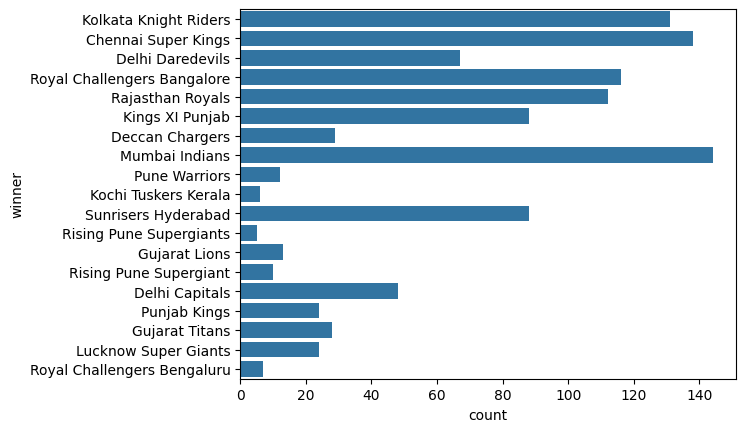

In [30]:
sns.countplot(df, y="winner")
plt.show()

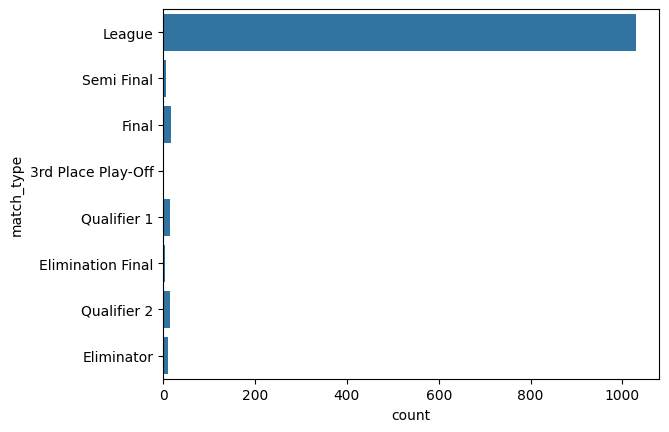

In [39]:
sns.countplot(df, y="match_type")
plt.show()

In [45]:
df_filtered = df[df['match_type'] == 'Final']


<Axes: ylabel='count'>

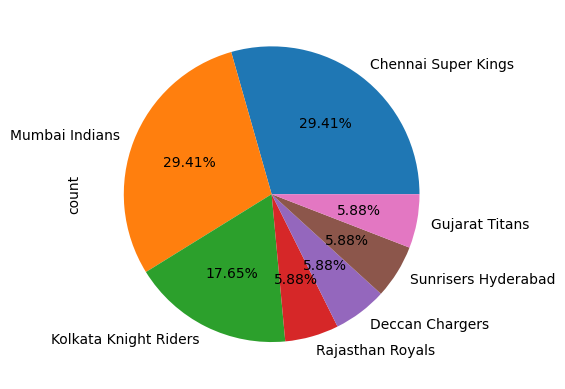

In [47]:
df_filtered['winner'].value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='count'>

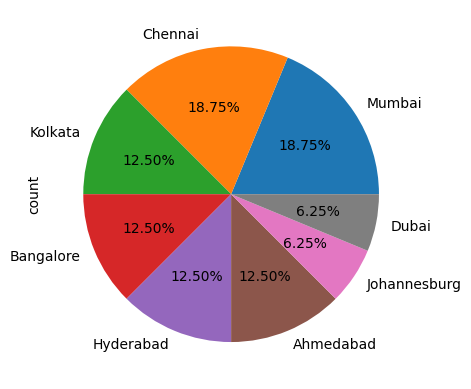

In [74]:
df_filtered['city'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [76]:
df_filtered 

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,toss_winner_same_as_winner
57,336040,2007/08,Mumbai,2008-06-01,Final,YK Pathan,Dr DY Patil Sports Academy,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,...,Rajasthan Royals,wickets,3.0,164.0,20.0,N,NaN,BF Bowden,RE Koertzen,1
114,392239,2009,Johannesburg,2009-05-24,Final,A Kumble,New Wanderers Stadium,Royal Challengers Bangalore,Deccan Chargers,Royal Challengers Bangalore,...,Deccan Chargers,runs,6.0,144.0,20.0,N,NaN,RE Koertzen,SJA Taufel,0
174,419165,2009/10,Mumbai,2010-04-25,Final,SK Raina,Dr DY Patil Sports Academy,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,...,Chennai Super Kings,runs,22.0,169.0,20.0,N,NaN,RE Koertzen,SJA Taufel,1
247,501271,2011,Chennai,2011-05-28,Final,M Vijay,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,...,Chennai Super Kings,runs,58.0,206.0,20.0,N,NaN,Asad Rauf,SJA Taufel,1
321,548381,2012,Chennai,2012-05-27,Final,MS Bisla,"MA Chidambaram Stadium, Chepauk",Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,...,Kolkata Knight Riders,wickets,5.0,191.0,20.0,N,NaN,BF Bowden,SJA Taufel,0
397,598073,2013,Kolkata,2013-05-26,Final,KA Pollard,Eden Gardens,Chennai Super Kings,Mumbai Indians,Mumbai Indians,...,Mumbai Indians,runs,23.0,149.0,20.0,N,NaN,HDPK Dharmasena,SJA Taufel,1
457,734049,2014,Bangalore,2014-06-01,Final,MK Pandey,M Chinnaswamy Stadium,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,...,Kolkata Knight Riders,wickets,3.0,200.0,20.0,N,NaN,HDPK Dharmasena,BNJ Oxenford,1
516,829823,2015,Kolkata,2015-05-24,Final,RG Sharma,Eden Gardens,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,...,Mumbai Indians,runs,41.0,203.0,20.0,N,NaN,HDPK Dharmasena,RK Illingworth,0
576,981019,2016,Bangalore,2016-05-29,Final,BCJ Cutting,M Chinnaswamy Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,...,Sunrisers Hyderabad,runs,8.0,209.0,20.0,N,NaN,HDPK Dharmasena,BNJ Oxenford,1
635,1082650,2017,Hyderabad,2017-05-21,Final,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,...,Mumbai Indians,runs,1.0,130.0,20.0,N,NaN,NJ Llong,S Ravi,1


In [49]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 57 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               17 non-null     int64  
 1   season           17 non-null     object 
 2   city             16 non-null     object 
 3   date             17 non-null     object 
 4   match_type       17 non-null     object 
 5   player_of_match  17 non-null     object 
 6   venue            17 non-null     object 
 7   team1            17 non-null     object 
 8   team2            17 non-null     object 
 9   toss_winner      17 non-null     object 
 10  toss_decision    17 non-null     object 
 11  winner           17 non-null     object 
 12  result           17 non-null     object 
 13  result_margin    17 non-null     float64
 14  target_runs      17 non-null     float64
 15  target_overs     17 non-null     float64
 16  super_over       17 non-null     object 
 17  method           1 n

<Axes: ylabel='count'>

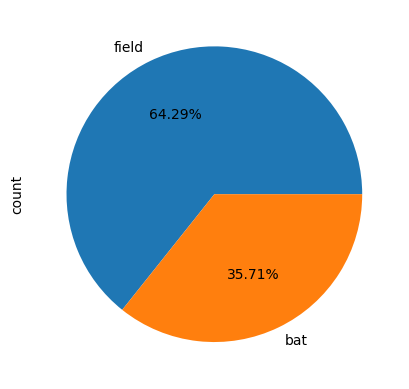

In [54]:
df['toss_decision'].value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='count'>

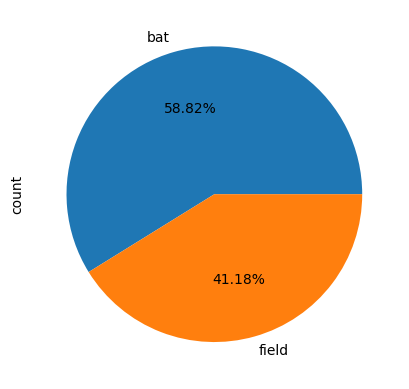

In [56]:
df_filtered['toss_decision'].value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='count'>

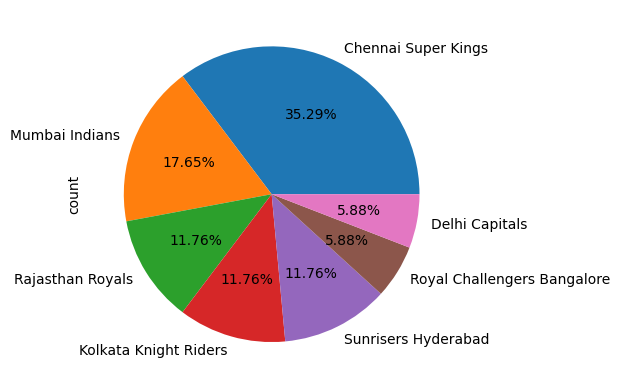

In [58]:
df_filtered['toss_winner'].value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='count'>

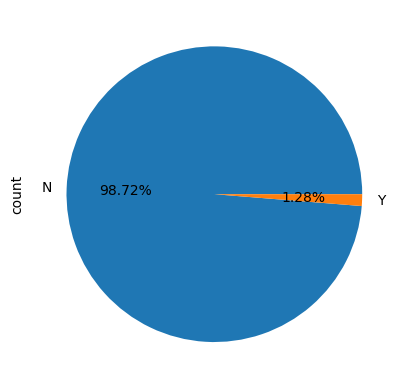

In [79]:
df['super_over'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [72]:
df_filtered ['player_of_match'].value_counts()


player_of_match
YK Pathan       1
KH Pandya       1
DP Conway       1
HH Pandya       1
F du Plessis    1
TA Boult        1
JJ Bumrah       1
SR Watson       1
BCJ Cutting     1
A Kumble        1
RG Sharma       1
MK Pandey       1
KA Pollard      1
MS Bisla        1
M Vijay         1
SK Raina        1
MA Starc        1
Name: count, dtype: int64

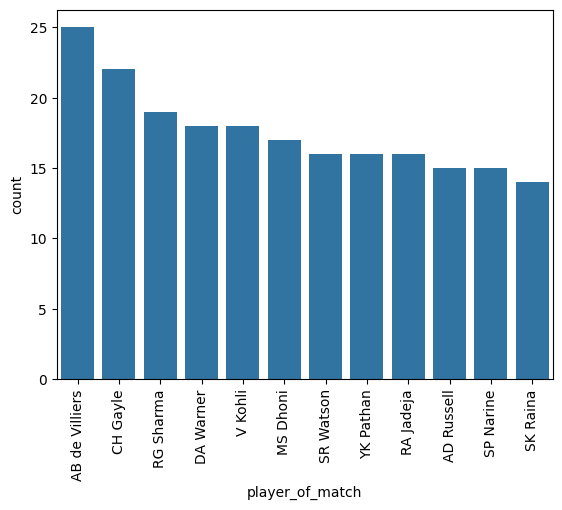

In [69]:
df_filtered ['winner'].value_counts()


winner
Chennai Super Kings      5
Mumbai Indians           5
Kolkata Knight Riders    3
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Gujarat Titans           1
Name: count, dtype: int64